In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Mental Fitness Tracker/Dataset.csv")

In [ ]:
data.head()

,Record ID,Stress Level,Anxiety Level,Depression Level,Mood Level,Drug Use,Overall Mental Health
0,1,5,3,2,7,0,3
1,2,6,4,3,6,0,2
2,3,7,5,4,5,1,1
3,4,4,2,1,7,0,3
4,5,3,1,2,8,0,4


In [ ]:
data.isnull().sum()

Record ID                0
Stress Level             0
Anxiety Level            0
Depression Level         0
Mood Level               0
Drug Use                 0
Overall Mental Health    0
dtype: int64

[]

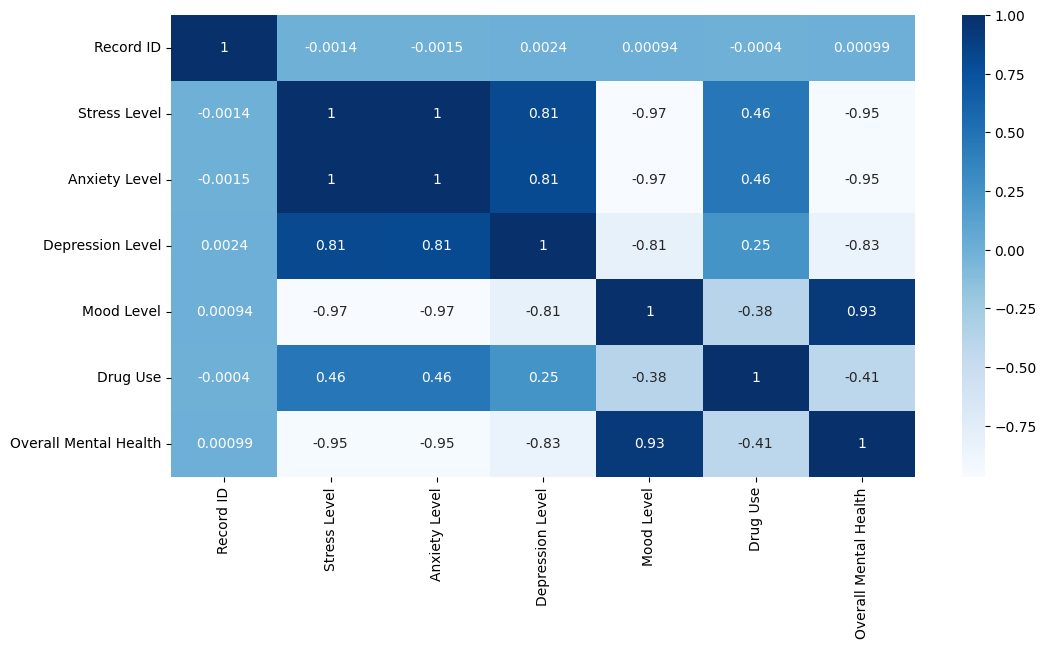

In [ ]:
plt.figure(figsize=(12,6))
sns.heatmap(data.corr(),annot=True,cmap='Blues')
plt.plot()

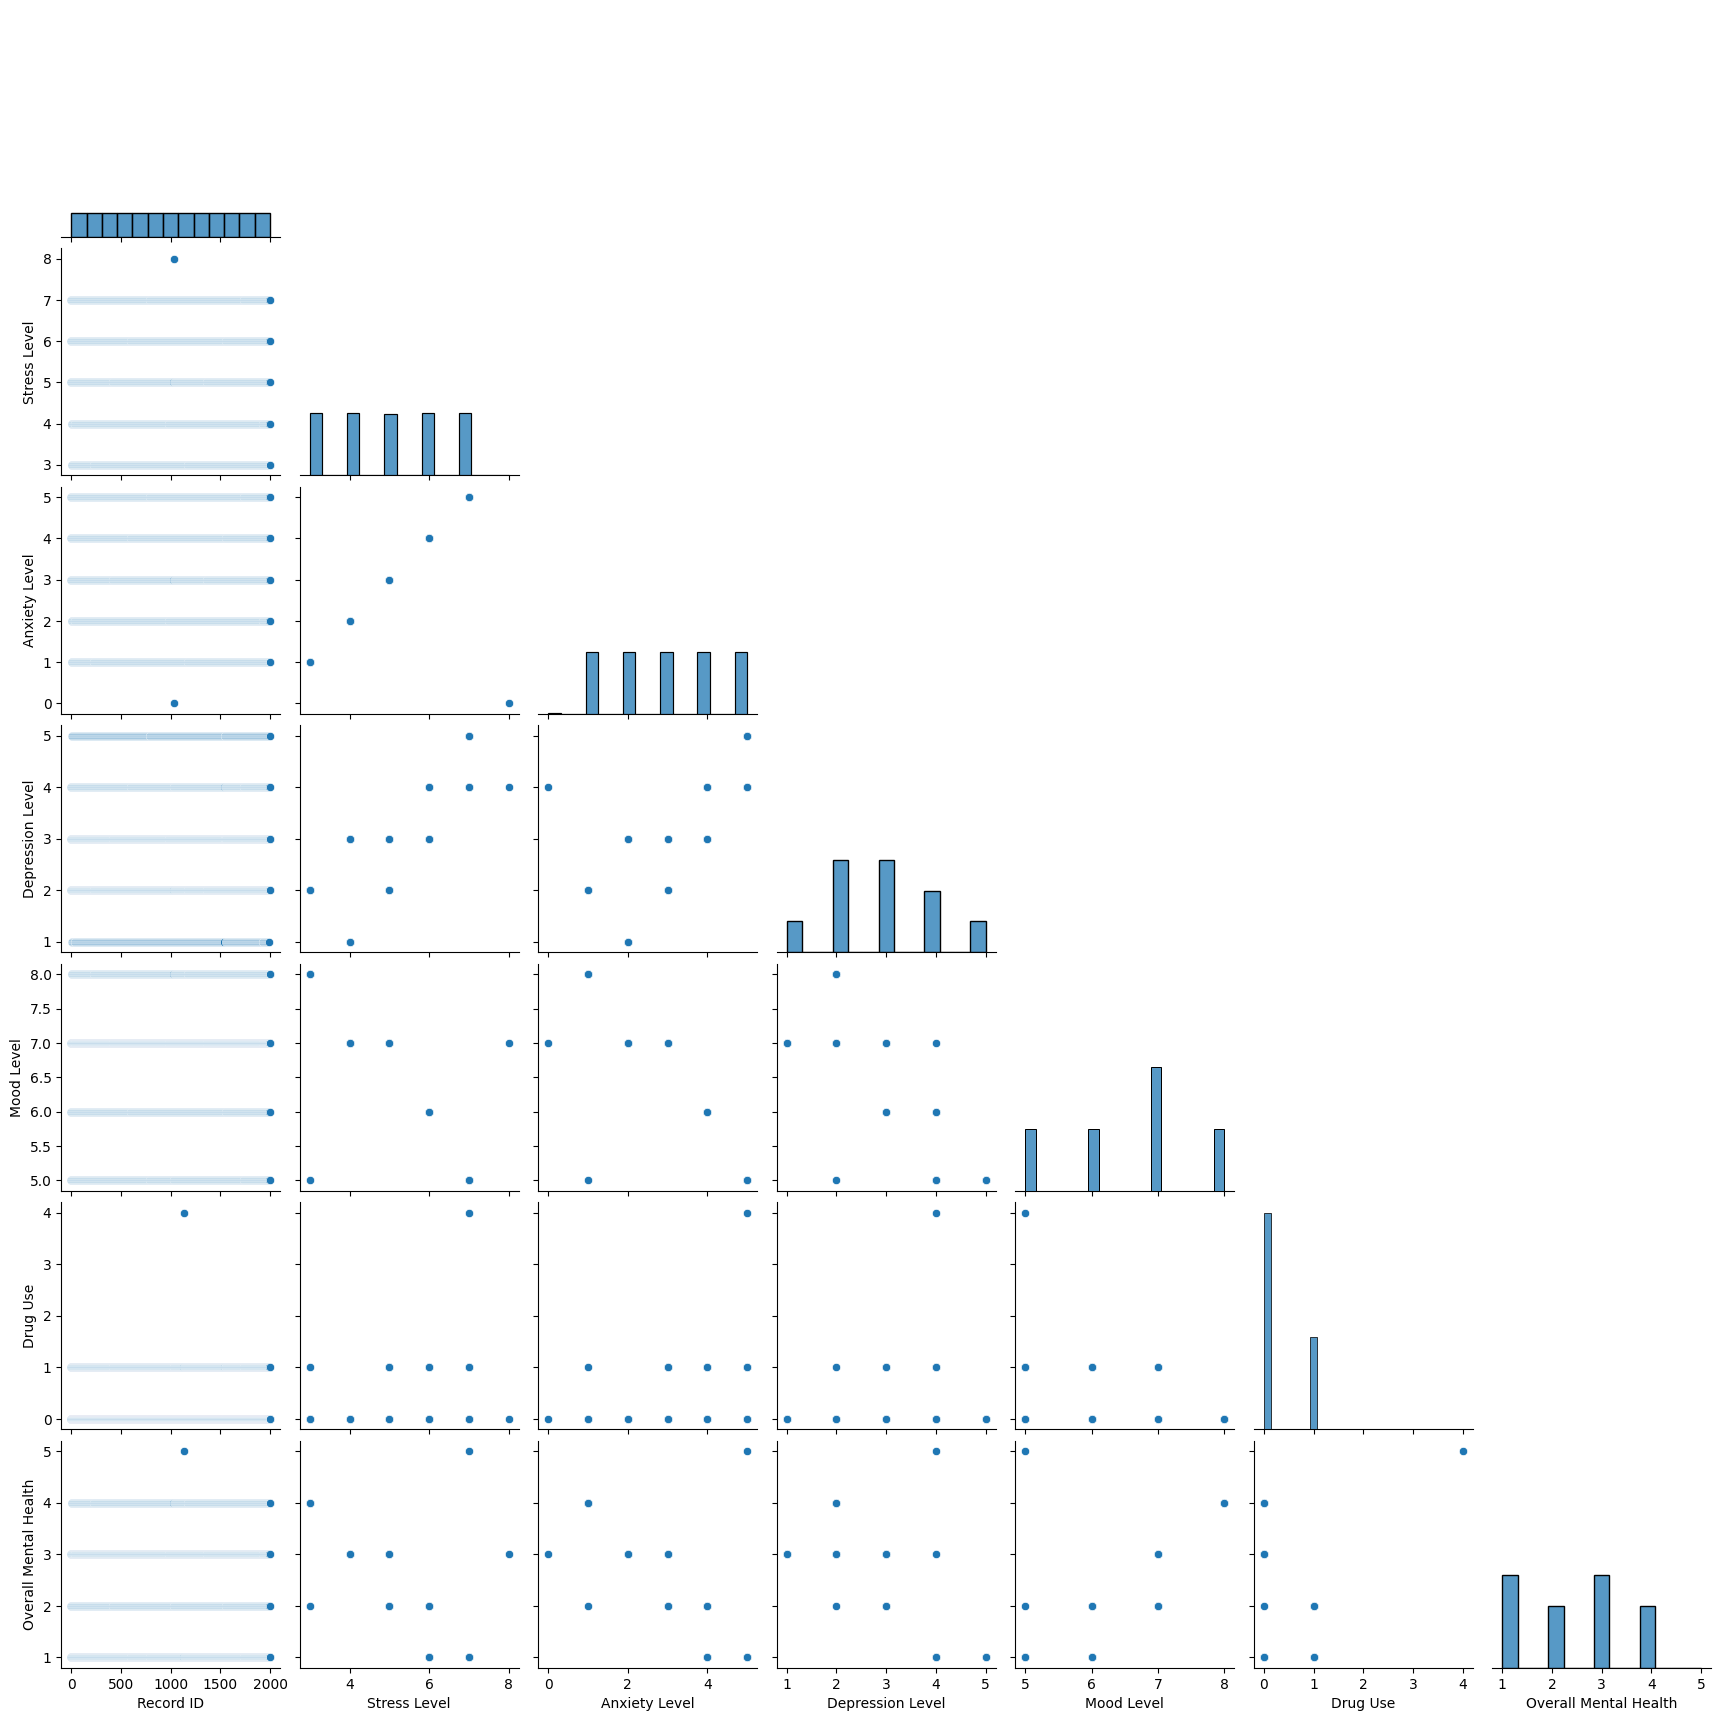

In [ ]:
sns.pairplot(data,corner=True)
plt.show()

In [ ]:
mean = data['Overall Mental Health'].mean()
mean

2.401

In [ ]:
fig = px.pie(data,values='Overall Mental Health',names='Overall Mental Health')
fig.show()

In [ ]:
fig = px.line(data, x="Record ID",y="Overall Mental Health",markers=True,color_discrete_sequence=['red','blue'],template='plotly_dark')
fig.show()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   Record ID              2000 non-null   int64
 1   Stress Level           2000 non-null   int64
 2   Anxiety Level          2000 non-null   int64
 3   Depression Level       2000 non-null   int64
 4   Mood Level             2000 non-null   int64
 5   Drug Use               2000 non-null   int64
 6   Overall Mental Health  2000 non-null   int64
dtypes: int64(7)
memory usage: 109.5 KB


In [ ]:
data.shape

(2000, 7)

In [ ]:
x = data.drop('Overall Mental Health',axis=1)
y = data['Overall Mental Health']

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=.20,random_state=2)

In [ ]:
print("x_train :",x_train.shape)
print("x_test :",x_test.shape)
print("\ny_train :",y_train.shape)
print("y_test :",y_test.shape)

x_train : (1600, 6)
x_test : (400, 6)

y_train : (1600,)
y_test : (400,)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
lr = LinearRegression()
lr.fit(x_train,y_train)

y_pred = lr.predict(x_train)

mse = mean_squared_error(y_train,y_pred)

rmse = (np.sqrt(mse))

r2 = r2_score(y_train,y_pred)

print("The Linear Regression model performance for training set")
print("<------------------------------------------------------>")
print("MSE is {}",format(mse))
print("RMSE is {}",format(rmse))
print("R2 score is {}",format(r2))


The Linear Regression model performance for training set
<------------------------------------------------------>
MSE is {} 0.10917218884898648
RMSE is {} 0.33041214997179885
R2 score is {} 0.9129986992635027


In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(x_train,y_train)

y_pred = rf.predict(x_train)

mse = mean_squared_error(y_train,y_pred)

rmse = (np.sqrt(mse))

r2 = r2_score(y_train,y_pred)

print("The Random Forest Regressor model performance for training set")
print("<------------------------------------------------------>")
print("MSE is {}",format(mse))
print("RMSE is {}",format(rmse))
print("R2 score is {}",format(r2))

The Random Forest Regressor model performance for training set
<------------------------------------------------------>
MSE is {} 0.0013893125000000001
RMSE is {} 0.03727348253115075
R2 score is {} 0.9988928316276898


In [ ]:
y_pred = lr.predict(x_test)

mse = mean_squared_error(y_test,y_pred)

rmse = (np.sqrt(mse))

r2 = r2_score(y_test,y_pred)

print("The Linear Regression model performance for testing set")
print("<------------------------------------------------------>")
print("MSE is {}",format(mse))
print("RMSE is {}",format(rmse))
print("R2 score is {}",format(r2))



y_pred = rf.predict(x_test)

mse = mean_squared_error(y_test,y_pred)

rmse = (np.sqrt(mse))

r2 = r2_score(y_test,y_pred)

print("\nThe Random Forest Regressor model performance for testing set")
print("<------------------------------------------------------>")
print("MSE is {}",format(mse))
print("RMSE is {}",format(rmse))
print("R2 score is {}",format(r2))

The Linear Regression model performance for testing set
<------------------------------------------------------>
MSE is {} 0.10276942710829776
RMSE is {} 0.3205767101776075
R2 score is {} 0.9123085667650024

The Random Forest Regressor model performance for testing set
<------------------------------------------------------>
MSE is {} 0.0
RMSE is {} 0.0
R2 score is {} 1.0
